<a href="https://colab.research.google.com/github/AanchalA/WeekendProjects/blob/main/Water_Quailty_Check.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 - [Calculus — ML Glossary documentation](https://import.cdn.thinkific.com/118220/pl5jLaTUQReKktqX3Nso_Calculus%20%E2%80%94%20ML%20Glossary%20documentation.pdf)

 - [Softmax Activation Function in Machine Learning](https://import.cdn.thinkific.com/118220/8ytJY3pCQ42Fu6TuABPx_Softmax%20Activation%20Function.pdf)


# 1. About the Project

In this project, we provide a water quality dataset from the Central Pollution Control Board (CPCB). You will use this dataset to predict water quality.

Access to clean water is a fundamental necessity, yet water quality can vary significantly based on environmental, geographical, and human factors. The dataset includes water quality monitoring data from across India, with chemical and physical parameters measured at various locations over different years (2019, 2020, 2021, 2022).


The dataset contains the following columns:

    Well_ID, State, District, Block, Village: Geographical identifiers of water sampling locations.

    Latitude, Longitude: Spatial coordinates for precise mapping.

    Year: The year in which the sample was recorded.

    Water Quality Indicators:
        pH
        Electrical Conductivity (EC)
        Carbonates (CO3)
        Bicarbonates (HCO3)
        Chlorides (Cl)
        Sulfates (SO4)
        Nitrates (NO3)
        Total Hardness (TH)
        Calcium (Ca)
        Magnesium (Mg)
        Sodium (Na)
        Potassium (K)
        Fluoride (F)
        Total Dissolved Solids (TDS)

Target Variables:

    - Water Quality Index (WQI): A numerical representation of overall water quality derived from chemical and physical parameters.
    
    - Water Quality Classification: A categorical label indicating the quality of water (e.g., Good, Poor, Unsuitable for Drinking).

In this project, your task is to build Deep Learning Neural Networks to predict the following:

    Water Quality Index (WQI)
    Water Quality Classification

You can download the dataset from the attachment provided and build the models using that. Once the models are built, calculate metrics such as the R² score for regression and accuracy/F1 score for classification, and submit your ipynb file for evaluation.

---
# 2. Solution Breakdown

- EDA
- Data pre-processing
    - Lower case conversion
    - Remove special characters "_", "*" -> " "
    - Remove numbers from village names
    - Data type converions
    - Missing values
    - Categorical encoding
    - Feature engineering and Feture selection
    - Numerical data normalization
- Activation Function selection
- Optimizer Selection
- Loss function selection
- Check for vanishing and exploading gradients
    - Fix with batch normalization
    - Weight initilizations (Xavier/He)
    - Activation function selection
- Make sure the model is not overfitting
    - Regularization - yes/no.
        - Dropout
        - weight_decay (L2)
        - early stopping
- Max GPU Utilization
- Hyperparameter Tuning
    - Optuna Library
- Evaluation Metric Selection




---
# 3. Loading Data Files


In [ ]:
import pandas as pd

In [ ]:
water_quality = pd.read_csv("/content/WknaT6YxR02YeXYuMDPg_water_quality.csv")
print(f"DataFrame Shape: {water_quality.shape}")
water_quality.head()

DataFrame Shape: (19029, 24)


,Well_ID,State,District,Block,Village,Latitude,Longitude,Year,pH,EC,...,NO3,TH,Ca,Mg,Na,K,F,TDS,WQI,Water Quality Classification
0,W232200071580001,Gujarat,Ahmedabad,Mandal,Dalod,NaN,NaN,2020,8.20,16640.0,...,26.00,1451.0,152.0,260.0,3535.0,45.0,1.00,11149,4361.44080,Unsuitable for Drinking
1,W254029084355301,Himachal Pradesh,Solan,Nallagarh,JAGATPUR,31.1594,76.678500,2019,8.44,299.0,...,2.70,84.0,17.0,10.0,39.0,2.4,0.20,262,85.80466,Good
2,W193530074180001,Maharashtra,Ahmednagar,SANGAMNER,Kokangaon,74.3000,19.591667,2022,7.90,1315.0,...,18.20,465.0,80.2,64.4,88.3,1.6,0.53,372,280.04130,Very Poor yet Drinkable
3,W231620072033001,Gujarat,Ahmedabad,Viramgam,Endla,NaN,NaN,2020,7.40,715.0,...,0.23,280.0,56.0,34.0,47.0,11.0,0.46,479,195.11649,Poor
4,W251908084361501,Himachal Pradesh,Solan,Nallagarh,BARUNA,31.1540,76.638400,2019,8.40,270.0,...,10.00,116.0,10.0,18.0,23.0,1.0,0.12,262,81.77860,Good


---
# 4. Exploratory Data Analysis

In [ ]:
water_quality.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19029 entries, 0 to 19028
Data columns (total 24 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Well_ID                       15244 non-null  object 
 1   State                         19029 non-null  object 
 2   District                      19029 non-null  object 
 3   Block                         17910 non-null  object 
 4   Village                       19028 non-null  object 
 5   Latitude                      18640 non-null  float64
 6   Longitude                     18639 non-null  float64
 7   Year                          19029 non-null  int64  
 8   pH                            19029 non-null  float64
 9   EC                            19029 non-null  float64
 10  CO3                           19029 non-null  float64
 11  HCO3                          19029 non-null  float64
 12  Cl                            19029 non-null  float64
 13  S

In [ ]:
water_quality.isnull().sum()

,0
Well_ID,3785
State,0
District,0
Block,1119
Village,1
Latitude,389
Longitude,390
Year,0
pH,0
EC,0


NULLS:
 - Well_ID: Not Needed
 - Block: Can be used in model 2
 - Latitude / Longitude: Maybe not needed


In [ ]:
water_quality.describe()

,Latitude,Longitude,Year,pH,EC,CO3,HCO3,Cl,SO4,NO3,TH,Ca,Mg,Na,K,F,TDS,WQI
count,1.864000e+04,1.863900e+04,19029.000000,19029.000000,19029.000000,19029.000000,19029.000000,19029.000000,19029.000000,19029.000000,19029.000000,19029.000000,19029.000000,19029.000000,19029.000000,19029.000000,19029.000000,19029.000000
mean,1.509049e+02,4.021432e+03,2020.286195,7.713495,1191.620744,3.326689,296.774490,171.843482,68.087940,35.114294,327.843466,65.114035,40.505256,113.673866,13.465496,0.595598,723.774239,305.291789
std,1.529204e+04,5.401512e+05,1.314794,0.491413,1348.094278,15.496995,180.861685,349.922000,148.853626,55.488528,310.386082,62.018322,49.654295,200.551600,38.839328,1.818577,755.575601,315.477116
min,0.000000e+00,0.000000e+00,2019.000000,2.800000,2.290000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,-0.160000,15.000000,9.043604
25%,1.998330e+01,2.522500e+01,2019.000000,7.450000,524.000000,0.000000,177.000000,32.000000,13.000000,4.460000,165.000000,28.100000,15.000000,28.000000,1.700000,0.206000,345.000000,146.642420
50%,2.417842e+01,7.617500e+01,2020.000000,7.720000,860.000000,0.000000,281.000000,78.000000,30.790000,18.000000,260.000000,50.100000,29.000000,60.400000,3.630000,0.430000,587.000000,232.078880
75%,7.571110e+01,7.953710e+01,2022.000000,8.000000,1390.000000,0.000000,390.400000,175.000000,69.000000,43.000000,400.000000,80.000000,49.800000,121.000000,9.510000,0.770000,913.000000,359.718240
max,2.087833e+06,7.374400e+07,2022.000000,10.920000,26520.000000,368.000000,3112.000000,9217.000000,7601.000000,1534.900000,8606.880000,1840.000000,1483.500000,5489.000000,1353.000000,168.000000,17768.000000,6850.888720


> STD of most of the numerical columns is very high. Data needs to be normalized.

Which normalization technique to use:
 - Standard Normalization
 - Min Max Normalization -  Preserving original distributions, rescaling to [0,1] range.
 - Z-Score Normalisation - Centering around 0 with unit variance, handling outliers better.

        TODO: Apply normalization after train-test split

In [ ]:
water_quality["Water Quality Classification"].value_counts()        ## Ordinal Cateories

,count
Water Quality Classification,
Unsuitable for Drinking,6608
Poor,5317
Very Poor yet Drinkable,4709
Good,1632
Excellent,763


- Village has a lot of "Block office values": replace these with values from "Block" column
- Replace NULL village value with "Block" column value

In [ ]:
water_quality[water_quality["Village"].isnull()]

,Well_ID,State,District,Block,Village,Latitude,Longitude,Year,pH,EC,...,NO3,TH,Ca,Mg,Na,K,F,TDS,WQI,Water Quality Classification
17034,NaN,Maharashtra,Aurangabad,KANNAD,NaN,20.1697,75.1317,2019,7.7,1391.0,...,27.0,345.0,64.0,44.0,78.0,1.22,0.09,904,340.27112,Unsuitable for Drinking


In [ ]:
water_quality["Village"].str.lower().value_counts().head(10)
# ['block office', 'in compound of bdo of', 'block h.q', 'block ??campus',
#  'hand pump of block off', 'bdo, office', 'bloock office', 'block hq', 'inside block office', 'in block office']

,count
Village,
block office,992
in compound of bdo of,33
block h.q,27
hand pump of block off,24
block ??campus,24
"bdo, office",22
bloock office,21
manikpur,16
block hq,15


---
# 5. Data Pre-Processing

## 5.1. Categorical Data Pre-processing

- Lower case conversion
- Remove any numbers from categorical values
- Remove special characters "_", "*" -> " "
- Categorical encoding  (Too Many categories for one hot encoding)
    - Number of unique categories in: State - 14 (one hot encoding, maybe)
    - Number of unique categories in: District - 600
    - Number of unique categories in: Block - 5056
    - Number of unique categories in: Village - 11211

- Type conversion to categorical
- For advanced categorical data processing for "District", "Block" and "Village", I can use fuzzywuzzy for identifying repeating values.  
- Should I club categories for which the frequency is very low???


In [ ]:
categorical_cols = water_quality.select_dtypes(include="O").columns
categorical_cols = categorical_cols.drop("Well_ID")

In [ ]:
for col in categorical_cols:
    print(f"Number of unique categories in: {col} - {len(water_quality[col].unique())}")

Number of unique categories in: State - 14
Number of unique categories in: District - 600
Number of unique categories in: Block - 5056
Number of unique categories in: Village - 11211
Number of unique categories in: Water Quality Classification - 5


### 5.1.1. Converting Data Type from object to category

In [ ]:
for col in categorical_cols:
    water_quality[col] = water_quality[col].astype("category")

In [ ]:
water_quality[categorical_cols].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19029 entries, 0 to 19028
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype   
---  ------                        --------------  -----   
 0   State                         19029 non-null  category
 1   District                      19029 non-null  category
 2   Block                         17910 non-null  category
 3   Village                       19028 non-null  category
 4   Water Quality Classification  19029 non-null  category
dtypes: category(5)
memory usage: 684.7 KB


### 5.1.2. Lower Case Conversion

In [ ]:
water_quality[categorical_cols] = water_quality[categorical_cols].apply(lambda x: x.str.lower())

water_quality[categorical_cols]

,State,District,Block,Village,Water Quality Classification
0,gujarat,ahmedabad,mandal,dalod,unsuitable for drinking
1,himachal pradesh,solan,nallagarh,jagatpur,good
2,maharashtra,ahmednagar,sangamner,kokangaon,very poor yet drinkable
3,gujarat,ahmedabad,viramgam,endla,poor
4,himachal pradesh,solan,nallagarh,baruna,good
...,...,...,...,...,...
19024,madhya pradesh,indore,indore,cable factory,unsuitable for drinking
19025,bihar,bhojpur,garhani,garhani,poor
19026,madhya pradesh,indore,indore,dudhiya,unsuitable for drinking
19027,bihar,bhojpur,koilwar,giddha,poor


In [ ]:
for col in categorical_cols:
    print(f"Number of unique categories in: {col} - {len(water_quality[col].unique())}")

Number of unique categories in: State - 14
Number of unique categories in: District - 481
Number of unique categories in: Block - 4347
Number of unique categories in: Village - 10482
Number of unique categories in: Water Quality Classification - 5


### 5.1.3. Removing Numbers

In [ ]:
water_quality[categorical_cols] = water_quality[categorical_cols].apply(lambda x: x.str.replace(r'\d+', '', regex=True))

In [ ]:
for col in categorical_cols:
    print(f"Number of unique categories in: {col} - {len(water_quality[col].unique())}")

Number of unique categories in: State - 14
Number of unique categories in: District - 481
Number of unique categories in: Block - 4336
Number of unique categories in: Village - 10279
Number of unique categories in: Water Quality Classification - 5


### 5.1.4. Removing Special Characters

In [ ]:
water_quality[categorical_cols] = water_quality[categorical_cols].apply(lambda x: x.str.replace(r'[^a-zA-Z\s]', '', regex=True))

In [ ]:
for col in categorical_cols:
    print(f"Number of unique categories in: {col} - {len(water_quality[col].unique())}")

Number of unique categories in: State - 14
Number of unique categories in: District - 477
Number of unique categories in: Block - 4330
Number of unique categories in: Village - 10229
Number of unique categories in: Water Quality Classification - 5


### 5.1.5. Pre-processing for "Village" column
 - Replace - "block office" with "Block" column values
 - Replace NULL Vlaue with "Block" column value

In [ ]:
replace_values = ['block office', 'block hq', 'in compound of bdo of', 'block campus',
       'hand pump of block off', 'bdo office', 'bloock office', 'inside block office', 'in block office']

water_quality["Village"] = water_quality.apply(lambda row: row["Block"] if row["Village"] in replace_values else row["Village"], axis=1)

water_quality["Village"].fillna(water_quality["Block"], inplace=True)

<ipython-input-23-603f29b6894a>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  water_quality["Village"].fillna(water_quality["Block"], inplace=True)


In [ ]:
for col in categorical_cols:
    print(f"Number of unique categories in: {col} - {len(water_quality[col].unique())}")

Number of unique categories in: State - 14
Number of unique categories in: District - 477
Number of unique categories in: Block - 4330
Number of unique categories in: Village - 11003
Number of unique categories in: Water Quality Classification - 5


### 5.1.6. Pre-processing for "Block" Column

- Replace NULL Values wit "Village" column values

In [ ]:
water_quality["Block"].fillna(water_quality["Village"], inplace=True)

<ipython-input-25-9e01b676d4b9>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  water_quality["Block"].fillna(water_quality["Village"], inplace=True)


In [ ]:
for col in categorical_cols:
    print(f"Number of unique categories in: {col} - {len(water_quality[col].unique())}")

Number of unique categories in: State - 14
Number of unique categories in: District - 477
Number of unique categories in: Block - 5322
Number of unique categories in: Village - 11003
Number of unique categories in: Water Quality Classification - 5


In [ ]:
water_quality[categorical_cols].isnull().sum()

,0
State,0
District,0
Block,0
Village,0
Water Quality Classification,0


### 5.1.7. Categorical Encoding - One Hot Encoding for State

In [ ]:
water_quality = pd.get_dummies(water_quality, columns=["State"], prefix="State", dtype=int)

water_quality.head()

,Well_ID,District,Block,Village,Latitude,Longitude,Year,pH,EC,CO3,...,State_gujarat,State_himachal pradesh,State_karnataka,State_kerala,State_madhya pradesh,State_maharashtra,State_tamil nadu,State_telangana,State_uttar pradesh,State_west bengal
0,W232200071580001,ahmedabad,mandal,dalod,NaN,NaN,2020,8.20,16640.0,0.0,...,1,0,0,0,0,0,0,0,0,0
1,W254029084355301,solan,nallagarh,jagatpur,31.1594,76.678500,2019,8.44,299.0,43.0,...,0,1,0,0,0,0,0,0,0,0
2,W193530074180001,ahmednagar,sangamner,kokangaon,74.3000,19.591667,2022,7.90,1315.0,0.0,...,0,0,0,0,0,1,0,0,0,0
3,W231620072033001,ahmedabad,viramgam,endla,NaN,NaN,2020,7.40,715.0,0.0,...,1,0,0,0,0,0,0,0,0,0
4,W251908084361501,solan,nallagarh,baruna,31.1540,76.638400,2019,8.40,270.0,43.0,...,0,1,0,0,0,0,0,0,0,0


### 5.1.8. Categorical Encoding - District and Block

Dropping "Village" column from training data as that would increase dimensionality of data too much - Using "Bolck" features instead.

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
district_encoder = LabelEncoder()

# Apply Encoding
water_quality["district_encoded"] = district_encoder.fit_transform(water_quality["District"])

water_quality.head()

,Well_ID,District,Block,Village,Latitude,Longitude,Year,pH,EC,CO3,...,State_himachal pradesh,State_karnataka,State_kerala,State_madhya pradesh,State_maharashtra,State_tamil nadu,State_telangana,State_uttar pradesh,State_west bengal,district_encoded
0,W232200071580001,ahmedabad,mandal,dalod,NaN,NaN,2020,8.20,16640.0,0.0,...,0,0,0,0,0,0,0,0,0,3
1,W254029084355301,solan,nallagarh,jagatpur,31.1594,76.678500,2019,8.44,299.0,43.0,...,1,0,0,0,0,0,0,0,0,401
2,W193530074180001,ahmednagar,sangamner,kokangaon,74.3000,19.591667,2022,7.90,1315.0,0.0,...,0,0,0,0,1,0,0,0,0,4
3,W231620072033001,ahmedabad,viramgam,endla,NaN,NaN,2020,7.40,715.0,0.0,...,0,0,0,0,0,0,0,0,0,3
4,W251908084361501,solan,nallagarh,baruna,31.1540,76.638400,2019,8.40,270.0,43.0,...,1,0,0,0,0,0,0,0,0,401


In [ ]:
block_encoder = LabelEncoder()

water_quality["block_encoded"] = block_encoder.fit_transform(water_quality["Block"])

water_quality.head()

,Well_ID,District,Block,Village,Latitude,Longitude,Year,pH,EC,CO3,...,State_karnataka,State_kerala,State_madhya pradesh,State_maharashtra,State_tamil nadu,State_telangana,State_uttar pradesh,State_west bengal,district_encoded,block_encoded
0,W232200071580001,ahmedabad,mandal,dalod,NaN,NaN,2020,8.20,16640.0,0.0,...,0,0,0,0,0,0,0,0,3,2961
1,W254029084355301,solan,nallagarh,jagatpur,31.1594,76.678500,2019,8.44,299.0,43.0,...,0,0,0,0,0,0,0,0,401,3356
2,W193530074180001,ahmednagar,sangamner,kokangaon,74.3000,19.591667,2022,7.90,1315.0,0.0,...,0,0,0,1,0,0,0,0,4,4330
3,W231620072033001,ahmedabad,viramgam,endla,NaN,NaN,2020,7.40,715.0,0.0,...,0,0,0,0,0,0,0,0,3,5231
4,W251908084361501,solan,nallagarh,baruna,31.1540,76.638400,2019,8.40,270.0,43.0,...,0,0,0,0,0,0,0,0,401,3356


### 5.1.9. Categorical Encoding - Ordinal Encoding for Water Quality

In [ ]:
from sklearn.preprocessing import OrdinalEncoder

In [ ]:
# water_quality["Water Quality Classification"].cat.categories.values

In [ ]:
ordered_categories = ['excellent',
                      'good',
                      'poor',
                      'very poor yet drinkable',
                      'unsuitable for drinking']

In [ ]:
ordinal_encoder = OrdinalEncoder(categories=[ordered_categories])

water_quality["water_quality_encoded"] = ordinal_encoder.fit_transform(water_quality[["Water Quality Classification"]])

In [ ]:
water_quality.head()

,Well_ID,District,Block,Village,Latitude,Longitude,Year,pH,EC,CO3,...,State_kerala,State_madhya pradesh,State_maharashtra,State_tamil nadu,State_telangana,State_uttar pradesh,State_west bengal,district_encoded,block_encoded,water_quality_encoded
0,W232200071580001,ahmedabad,mandal,dalod,NaN,NaN,2020,8.20,16640.0,0.0,...,0,0,0,0,0,0,0,3,2961,4.0
1,W254029084355301,solan,nallagarh,jagatpur,31.1594,76.678500,2019,8.44,299.0,43.0,...,0,0,0,0,0,0,0,401,3356,1.0
2,W193530074180001,ahmednagar,sangamner,kokangaon,74.3000,19.591667,2022,7.90,1315.0,0.0,...,0,0,1,0,0,0,0,4,4330,3.0
3,W231620072033001,ahmedabad,viramgam,endla,NaN,NaN,2020,7.40,715.0,0.0,...,0,0,0,0,0,0,0,3,5231,2.0
4,W251908084361501,solan,nallagarh,baruna,31.1540,76.638400,2019,8.40,270.0,43.0,...,0,0,0,0,0,0,0,401,3356,1.0


In [ ]:
water_quality.to_csv("processed_water_quality.csv", index=False)

---
# 6. Classification Model for Water Qualtiy Category Prediction

## 6.1. Train-Test Split

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
water_quality.columns

Index(['Well_ID', 'District', 'Block', 'Village', 'Latitude', 'Longitude',
       'Year', 'pH', 'EC', 'CO3', 'HCO3', 'Cl', 'SO4', 'NO3', 'TH', 'Ca', 'Mg',
       'Na', 'K', 'F', 'TDS', 'WQI', 'Water Quality Classification',
       'State_andhra pradesh', 'State_assam', 'State_bihar', 'State_delhi',
       'State_gujarat', 'State_himachal pradesh', 'State_karnataka',
       'State_kerala', 'State_madhya pradesh', 'State_maharashtra',
       'State_tamil nadu', 'State_telangana', 'State_uttar pradesh',
       'State_west bengal', 'district_encoded', 'block_encoded',
       'water_quality_encoded'],
      dtype='object')

In [ ]:
X = water_quality.drop(columns=['Well_ID', 'District', 'Block', 'Village',
                                'Latitude', 'Longitude','Water Quality Classification',
                                'water_quality_encoded', 'WQI'])

y = water_quality["water_quality_encoded"].astype(int)

print(f"DataFrame Shapes: X Shape - {X.shape} | {y.shape}")

DataFrame Shapes: X Shape - (19029, 31) | (19029,)


In [ ]:
X.head()

,Year,pH,EC,CO3,HCO3,Cl,SO4,NO3,TH,Ca,...,State_karnataka,State_kerala,State_madhya pradesh,State_maharashtra,State_tamil nadu,State_telangana,State_uttar pradesh,State_west bengal,district_encoded,block_encoded
0,2020,8.20,16640.0,0.0,1257.0,5176.0,822.0,26.00,1451.0,152.0,...,0,0,0,0,0,0,0,0,3,2961
1,2019,8.44,299.0,43.0,87.0,21.0,0.0,2.70,84.0,17.0,...,0,0,0,0,0,0,0,0,401,3356
2,2022,7.90,1315.0,0.0,518.7,120.5,61.6,18.20,465.0,80.2,...,0,0,0,1,0,0,0,0,4,4330
3,2020,7.40,715.0,0.0,354.0,50.0,18.0,0.23,280.0,56.0,...,0,0,0,0,0,0,0,0,3,5231
4,2019,8.40,270.0,43.0,87.0,14.0,0.0,10.00,116.0,10.0,...,0,0,0,0,0,0,0,0,401,3356


In [ ]:
y.head()

,water_quality_encoded
0,4
1,1
2,3
3,2
4,1


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((15223, 31), (3806, 31), (15223,), (3806,))

## 6.2. Numerical Data Pre-processing

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
X_numerical_cols = X.select_dtypes(include="number").columns
scaler = MinMaxScaler()

X_train[X_numerical_cols] = scaler.fit_transform(X_train[X_numerical_cols])
X_test[X_numerical_cols] = scaler.transform(X_test[X_numerical_cols])

## 6.3. Building the PyTorch Dataset Class

In [ ]:
from torch.utils.data import Dataset

In [ ]:
X.iloc[34].values, y.iloc[34]

(array([2.022e+03, 8.120e+00, 7.842e+02, 0.000e+00, 2.929e+02, 5.670e+01,
        6.350e+01, 1.670e+01, 2.800e+02, 6.010e+01, 3.160e+01, 4.430e+01,
        6.400e+00, 5.600e-01, 8.420e+02, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 4.000e+00,
        4.499e+03]),
 3)

In [ ]:
import numpy as np

In [ ]:
ordinal_encoder.inverse_transform(np.array([3]).reshape(1, -1))

array([['very poor yet drinkable']], dtype=object)

 > Do I have to convert the input "data" from array to "Tensor"??

In [ ]:
class WaterQualtiyDataset(Dataset):
    def __init__(self, dataframe, labels) -> None:
        # super().__init__()
        self.dataframe = dataframe
        self.labels = labels

    def __getitem__(self, index):
        return {"data": self.dataframe.iloc[index].values,
                "label": self.labels.iloc[index]}

    def __len__(self):
        return self.dataframe.shape[0]

In [ ]:
train_data = WaterQualtiyDataset(X_train, y_train)
train_data[45]

{'data': array([0.33333333, 0.64039409, 0.03083637, 0.        , 0.06027494,
        0.00770316, 0.0157874 , 0.02671184, 0.03568158, 0.01304348,
        0.04111898, 0.00801603, 0.0014782 , 0.00239058, 0.02917817,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 1.        ,
        0.        , 0.        , 0.        , 0.        , 0.62605042,
        0.62593985]),
 'label': 3}

In [ ]:
test_data = WaterQualtiyDataset(X_test, y_test)

## 6.4. Creating DataLoaders

In [ ]:
import os
from torch.utils.data import DataLoader

In [ ]:
NUM_WORKERS = os.cpu_count()
BATCH_SIZE = 64

In [ ]:
train_dataloader = DataLoader(train_data, shuffle=True, num_workers=NUM_WORKERS, batch_size=BATCH_SIZE)
len(train_dataloader)

238

In [ ]:
test_dataloader = DataLoader(test_data, shuffle=True, num_workers=NUM_WORKERS, batch_size=BATCH_SIZE)
len(test_dataloader)

60

In [ ]:
(next(iter(train_dataloader)))["data"][0]

tensor([1.0000, 0.6663, 0.0278, 0.0000, 0.0839, 0.0042, 0.0055, 0.0519, 0.0275,
        0.0043, 0.0361, 0.0108, 0.0027, 0.0101, 0.0457, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.6891, 0.7055], dtype=torch.float64)

In [ ]:
water_quality.water_quality_encoded.value_counts()

,count
water_quality_encoded,
4.0,6608
2.0,5317
3.0,4709
1.0,1632
0.0,763


## 6.5. Building the Classification Model

In [ ]:
import torch
from torch import nn
from tqdm.auto import tqdm
from pathlib import Path
from glob import glob
from sklearn.metrics import accuracy_score

### 6.5.1. Defining the Training Function

In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"

In [ ]:
models_path = Path("models")
models_path.mkdir(parents=True, exist_ok=True)

In [ ]:
# [os.remove(filepath) for filepath in glob(pathname="models/water_quality_classification_model_*.ckpt", recursive=True)]

In [ ]:
def train(model, loss_fn, optimizer, num_epochs, train_dataloader, test_dataloader,
          early_stopping=True, model_version=None):

    train_losses = []
    test_losses = []
    train_accuracy = []
    test_accuracy = []
    max_patience = 10
    best_loss = 1.0
    patience = 0

    model_version_path = Path(f"models/{model_version}")
    model_version_path.mkdir(parents=True, exist_ok=True)

    for epoch in tqdm(range(num_epochs)):
        model.train()
        train_loss = 0
        train_acc = 0
        for batch_index, batch_data in enumerate(train_dataloader):
            X, y = batch_data["data"].float().to(device), batch_data["label"].to(device)

            logits = model(X)

            loss = loss_fn(logits, y)
            train_loss += loss.item()

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            pred_class = torch.softmax(logits, dim=1).argmax(dim=1)
            train_acc += accuracy_score(y.detach().cpu().numpy(), pred_class.detach().cpu().numpy())

        train_loss = train_loss/len(train_dataloader)
        train_acc = train_acc/len(train_dataloader)
        train_losses.append(train_loss)
        train_accuracy.append(train_acc)

        model.eval()
        test_loss = 0
        test_acc = 0
        with torch.inference_mode():
            for batch_index, batch_data in enumerate(test_dataloader):
                X, y = batch_data["data"].float().to(device), batch_data["label"].to(device)

                logits = model(X)

                loss = loss_fn(logits, y)
                test_loss += loss.item()

                pred_class = torch.softmax(logits, dim=1).argmax(dim=1)
                test_acc += accuracy_score(y.detach().cpu().numpy(), pred_class.detach().cpu().numpy())

        test_loss = test_loss/len(test_dataloader)
        test_acc = test_acc/len(test_dataloader)
        test_losses.append(test_loss)
        test_accuracy.append(test_acc)

        if epoch % 10 == 0:
            print(f"EPOCH: {epoch + 1} | Train Loss: {train_loss: .4f} | Train Acc: {train_acc: .2f}% | "
                    f"Test Loss: {test_loss: .4f} | Test Acc: {test_acc: .2f}%")

        if early_stopping:
            if best_loss > test_loss:
                best_loss = test_loss
                patience = 0
                fname = model_version_path / f"water_quality_classification_model_{epoch + 1}.ckpt"
                torch.save(obj=model, f=fname)
                print(f"Saved the latest model to: {fname}")
            else:
                patience +=1

            if patience >= max_patience:
                print(f"Early stopping at: {epoch + 1}")
                break
        else:
            if epoch % 20 == 0:
                fname = model_version_path / f"water_quality_classification_model_{epoch + 1}.ckpt"
                torch.save(obj=model, f=fname)
                print(f"Saved the latest model to: {fname}")

    return train_losses, train_accuracy, test_losses, test_accuracy

### 6.5.2. Experiment 1
- Activation: LeakyRelU / Output - Softmax
- Optimizer:
    - RMSProp: Tried with RMSProp, train and test loss curves were very unstable, max test accuracy 92%
    - Adam: Sommther loss curves, max test accuracy 97%
- Evaluation Metric: Accuracy / F1-Score
- Loss Function: CrossEntropyLoss()
- Num Layers: 4 (Hidden Units - 31, 64, 128, 64 -> 5)

Other Things I haven't tried yet
- Hyperparameter Tuning
- Regularization
    - L2 - weight_decay
    - Early Stopping
    - Dropout
- Vanishing and Exploading Gradients:
    - Batch Norm
    - Weight Initilization
- Not using Momentom / Nestrove in Optimizer


In [ ]:
class WaterQualtiyClassificationV1(nn.Module):
    def __init__(self, input_features=31, output_classes=5) -> None:
        super().__init__()

        self.layers = nn.Sequential(
            nn.Linear(in_features=input_features, out_features=64),
            nn.LeakyReLU(),
            nn.Linear(in_features=64, out_features=128),
            nn.LeakyReLU(),
            nn.Linear(in_features=128, out_features=64),
            nn.LeakyReLU(),
            nn.Linear(in_features=64, out_features=output_classes),
        )

    def forward(self, x):
        return self.layers(x)

In [ ]:
model = WaterQualtiyClassificationV1()
model = model.to(device)
optimizer = torch.optim.Adam(model.parameters())
loss_fn = torch.nn.CrossEntropyLoss()

num_epochs = 100

train_losses, train_accuracy, test_losses, test_accuracy = train(model, loss_fn, optimizer, num_epochs=num_epochs,
                                                                 train_dataloader=train_dataloader,
                                                                 test_dataloader=test_dataloader,
                                                                 model_version="Classification_V1")

  0%|          | 0/100 [00:00<?, ?it/s]

EPOCH: 1 | Train Loss:  0.9291 | Train Acc:  0.59% | Test Loss:  0.4468 | Test Acc:  0.82%
Saved the latest model to: models/Classification_V1/water_quality_classification_model_1.ckpt
Saved the latest model to: models/Classification_V1/water_quality_classification_model_2.ckpt
Saved the latest model to: models/Classification_V1/water_quality_classification_model_3.ckpt
Saved the latest model to: models/Classification_V1/water_quality_classification_model_4.ckpt
Saved the latest model to: models/Classification_V1/water_quality_classification_model_5.ckpt
Saved the latest model to: models/Classification_V1/water_quality_classification_model_6.ckpt
Saved the latest model to: models/Classification_V1/water_quality_classification_model_9.ckpt
Saved the latest model to: models/Classification_V1/water_quality_classification_model_10.ckpt
EPOCH: 11 | Train Loss:  0.1115 | Train Acc:  0.95% | Test Loss:  0.1140 | Test Acc:  0.95%
Saved the latest model to: models/Classification_V1/water_qualit

#### Plotting the Loss and Accuracy Curves

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

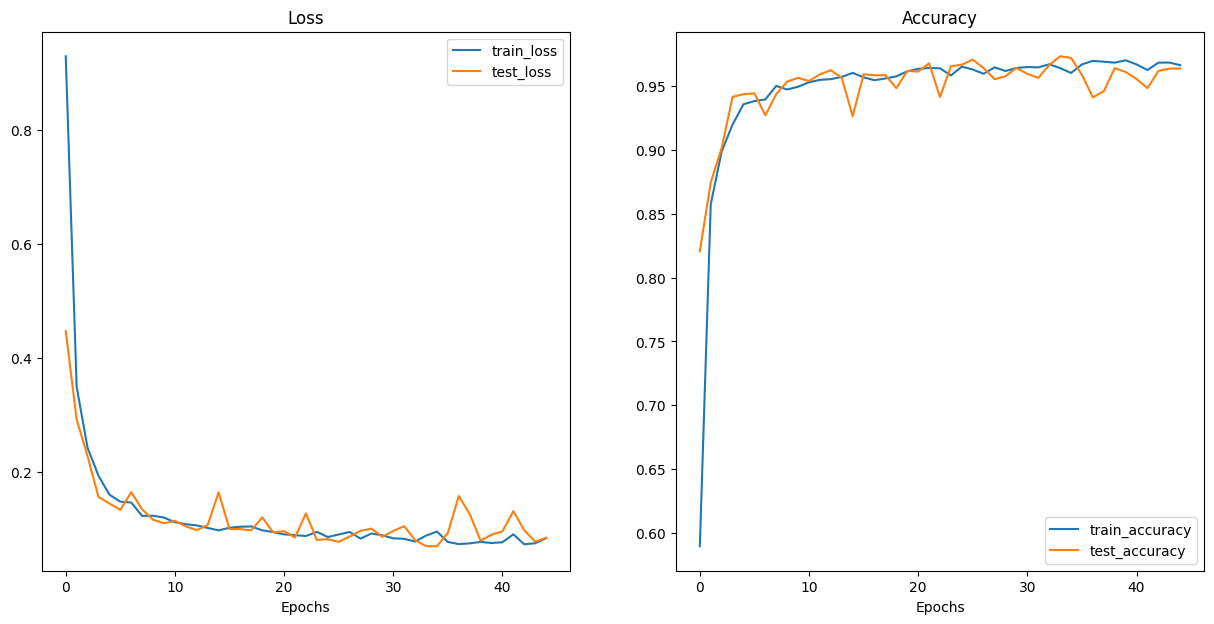

In [ ]:
# Setup a plot
plt.figure(figsize=(15, 7))
trained_epochs = 45

# Plot loss
plt.subplot(1, 2, 1)
plt.plot(range(trained_epochs), train_losses, label='train_loss')
plt.plot(range(trained_epochs), test_losses, label='test_loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.legend()

# Plot accuracy
plt.subplot(1, 2, 2)
plt.plot(range(trained_epochs), train_accuracy, label='train_accuracy')
plt.plot(range(trained_epochs), test_accuracy, label='test_accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.legend();

Loss and Accuracy Plots
- With RMSProp Optimizer -
    - Model is learning but there are a lot of fluctuations.
    - Sharp increase in loss at epoch 80, and multiple instances of sharp descrese in accruacy suggests overfitting
    - Is 64 a bigger batch size for this model. BatchNorm might help if that is the case.
- With Adam Optimizer -
    - Smoother training. Better Accuracy


### 6.5.3. Experiment 2

- Potential changes in
    - Change Learning Rate
    - Change Batch Size
    - Add Regularization (adding `weight_decay` parameter in optimizer)
    - Add Dropout
    - Add Batch Norm    
    - Use Optimizer with Momentum
    - Label smoothing (weighted loss calculation)

Adding
1. Dropout
2. Label Smooting
3. Training for max 200 epochs with early stopping.

In [ ]:
class WaterQualtiyClassificationV2(nn.Module):
    def __init__(self, input_features=31, output_classes=5) -> None:
        super().__init__()

        self.layers = nn.Sequential(
            nn.Linear(in_features=input_features, out_features=64),
            nn.LeakyReLU(),
            # nn.BatchNorm1d(num_features=64),
            nn.Dropout(p=0.5),
            nn.Linear(in_features=64, out_features=128),
            nn.LeakyReLU(),
            # nn.BatchNorm1d(num_features=128),
            nn.Dropout(p=0.5),
            nn.Linear(in_features=128, out_features=64),
            nn.LeakyReLU(),
            # nn.BatchNorm1d(num_features=64),                ## Not adding dropout too close to the output layer.
            nn.Linear(in_features=64, out_features=output_classes),
        )

    def forward(self, x):
        return self.layers(x)

In [ ]:
model = WaterQualtiyClassificationV2()
model = model.to(device)
optimizer = torch.optim.Adam(model.parameters())
loss_fn = torch.nn.CrossEntropyLoss(label_smoothing=0.1)

num_epochs = 200
train_losses, train_accuracy, test_losses, test_accuracy = train(model, loss_fn, optimizer,
                                                                 num_epochs=num_epochs,
                                                                 train_dataloader=train_dataloader,
                                                                 test_dataloader=test_dataloader,
                                                                 early_stopping=False,
                                                                 model_version="Classification_V2")

  0%|          | 0/200 [00:00<?, ?it/s]

EPOCH: 1 | Train Loss:  1.3120 | Train Acc:  0.45% | Test Loss:  1.0466 | Test Acc:  0.66%
Saved the latest model to: models/Classification_V2/water_quality_classification_model_1.ckpt
EPOCH: 11 | Train Loss:  0.6247 | Train Acc:  0.88% | Test Loss:  0.5413 | Test Acc:  0.93%
EPOCH: 21 | Train Loss:  0.5728 | Train Acc:  0.90% | Test Loss:  0.5043 | Test Acc:  0.94%
Saved the latest model to: models/Classification_V2/water_quality_classification_model_21.ckpt
EPOCH: 31 | Train Loss:  0.5431 | Train Acc:  0.92% | Test Loss:  0.4836 | Test Acc:  0.95%
EPOCH: 41 | Train Loss:  0.5316 | Train Acc:  0.93% | Test Loss:  0.4861 | Test Acc:  0.95%
Saved the latest model to: models/Classification_V2/water_quality_classification_model_41.ckpt
EPOCH: 51 | Train Loss:  0.5235 | Train Acc:  0.93% | Test Loss:  0.4767 | Test Acc:  0.96%
EPOCH: 61 | Train Loss:  0.5153 | Train Acc:  0.94% | Test Loss:  0.4648 | Test Acc:  0.97%
Saved the latest model to: models/Classification_V2/water_quality_classif

#### Plotting the Loss and Accuracy Curves

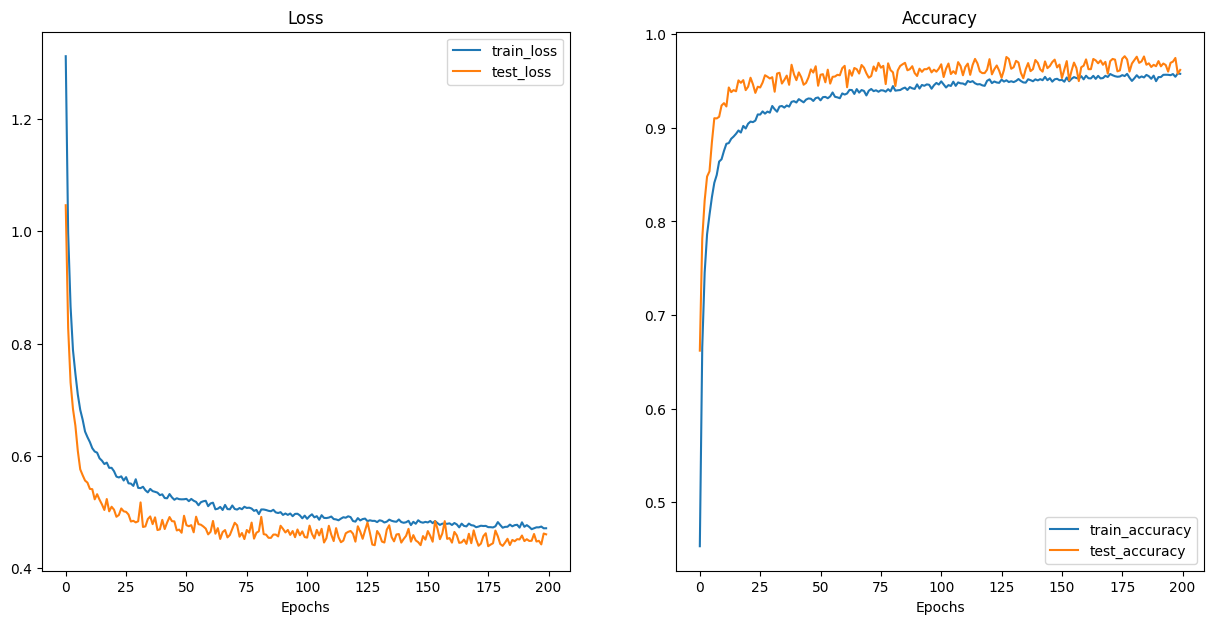

In [ ]:
# Setup a plot
plt.figure(figsize=(15, 7))

trained_epochs = 200

# Plot loss
plt.subplot(1, 2, 1)
plt.plot(range(trained_epochs), train_losses, label='train_loss')
plt.plot(range(trained_epochs), test_losses, label='test_loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.legend()

# Plot accuracy
plt.subplot(1, 2, 2)
plt.plot(range(trained_epochs), train_accuracy, label='train_accuracy')
plt.plot(range(trained_epochs), test_accuracy, label='test_accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.legend();

Experiment 2.1
- Removing early stopping as test loss curve is lower then train loss curve and test accuracy is higher than train_accuracy

### 6.5.4. Experiment 3 - Hyperparameter Tuning Using Optuna

In [ ]:
try:
    import optuna
except:
    ! pip install -q optuna
    import optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 383.6/383.6 kB 12.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 231.8/231.8 kB 20.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.5/78.5 kB 6.5 MB/s eta 0:00:00


In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using Device: {device}")

Using Device: cuda


In [ ]:
class WaterQualtiyClassificationOptuna(nn.Module):
    def __init__(self, num_features, num_classes, dropout_rate, num_layers, num_nodes) -> None:
        super().__init__()

        layers = []
        prev_nodes = num_features
        # Dynamically creating layers based on num_layers and num_nodes
        for _ in range(num_layers):
            layers.append(nn.Linear(prev_nodes, num_nodes))
            layers.append(nn.LeakyReLU())
            layers.append(nn.Dropout(dropout_rate))
            layers.append(nn.BatchNorm1d(num_nodes))
            prev_nodes = num_nodes

        # Output Layer
        layers.append(nn.Linear(prev_nodes, num_classes))
        self.layers = nn.Sequential(*layers)

    def forward(self, x):
        x = self.layers(x)
        x = torch.softmax(x, dim=1)
        return x

In [ ]:
def train_and_evaluate_model_optuna(
    model, X_train, y_train, X_test, y_test, optimizer_optuna,
    batch_size=128, num_epochs=120, print_every=10, show_plot=False
):
    # Ensure model is on the correct device
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model.to(device)

    train_losses = []
    test_losses = []

    # Define Dataloaders
    train_data = WaterQualtiyDataset(X_train, y_train)
    train_dataloader = DataLoader(train_data, shuffle=True, num_workers=NUM_WORKERS, batch_size=batch_size)

    test_data = WaterQualtiyDataset(X_test, y_test)
    test_dataloader = DataLoader(test_data, shuffle=False, num_workers=NUM_WORKERS, batch_size=batch_size)

    loss_fn = nn.CrossEntropyLoss()

    best_test_acc = 0  # Track best test accuracy

    for epoch in tqdm(range(num_epochs)):
        model.train()
        train_loss = 0
        train_preds_list, train_labels_list = [], []

        for batch_data in train_dataloader:
            X_train_batch, y_train_batch = batch_data["data"].float().to(device), batch_data["label"].to(device)

            optimizer_optuna.zero_grad()
            pred_probs = model(X_train_batch)

            loss = loss_fn(pred_probs, y_train_batch)
            train_loss += loss.item()

            loss.backward()
            optimizer_optuna.step()

            # Store predictions for accuracy calculation
            train_preds_list.extend(torch.argmax(pred_probs, dim=1).cpu().numpy())
            train_labels_list.extend(y_train_batch.cpu().numpy())

        # Compute training loss and accuracy
        train_loss /= len(train_dataloader)
        train_losses.append(train_loss)
        train_acc = accuracy_score(train_labels_list, train_preds_list)

        # Evaluation
        model.eval()
        test_loss = 0
        test_preds_list, test_labels_list = [], []

        with torch.no_grad():
            for batch_data in test_dataloader:
                X_test_batch, y_test_batch = batch_data["data"].float().to(device), batch_data["label"].to(device)
                pred_probs = model(X_test_batch)

                loss = loss_fn(pred_probs, y_test_batch)
                test_loss += loss.item()

                # Store predictions for accuracy calculation
                test_preds_list.extend(torch.argmax(pred_probs, dim=1).cpu().numpy())
                test_labels_list.extend(y_test_batch.cpu().numpy())

        # Compute test loss and accuracy
        test_loss /= len(test_dataloader)
        test_losses.append(test_loss)
        test_acc = accuracy_score(test_labels_list, test_preds_list)

        # Track the best test accuracy
        best_test_acc = max(best_test_acc, test_acc)

        if (epoch + 1) % print_every == 0:
            print(f"EPOCH: {epoch + 1} | Train Loss: {train_loss:.4f} | Train Acc: {train_acc:.2%} | "
                  f"Test Loss: {test_loss:.4f} | Test Acc: {test_acc:.2%}")

    # Plot loss curve if needed
    if show_plot:
        plt.plot(range(num_epochs), train_losses, label="Train Loss")
        plt.plot(range(num_epochs), test_losses, label="Test Loss")
        plt.legend()
        plt.title("Loss Curve")
        plt.xlabel("Epochs")
        plt.ylabel("Loss")
        plt.show()

    return train_acc, best_test_acc  # Return the best test accuracy over epochs


In [ ]:
def objective(trial):

    # Hyperparameters to be optimized
    dropout_rate = trial.suggest_float("dropout_rate", 0.1, 0.5)
    num_layers = trial.suggest_int("num_layers", 2, 5)
    num_nodes = trial.suggest_categorical("num_nodes", [64, 128])
    lr = trial.suggest_float("lr", 1e-5, 1e-1, log=True)

    model = WaterQualtiyClassificationOptuna(num_features=31, num_classes=5,
                                     dropout_rate=dropout_rate,
                                     num_layers=num_layers,
                                     num_nodes=num_nodes)
    model = model.to(device)

    optimizer = torch.optim.Adam(model.parameters(), lr=lr)

    train_accuracy, test_accuracy = train_and_evaluate_model_optuna(model, X_train, y_train, X_test, y_test,
                                                                    optimizer, batch_size=128, num_epochs=50,
                                                                    print_every=10, show_plot=False)

    return test_accuracy

In [ ]:
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=10)

# Display the best trial rresults
print("Best trial:")
trial = study.best_trial
print(f"Value: {trial.value}")
print(f"Params:")
for key, value in trial.params.items():
    print(f"{key}: {value}")

[I 2025-03-13 15:42:55,651] A new study created in memory with name: no-name-8794c591-029f-4d5c-abd3-dfb58e6ec445


  0%|          | 0/50 [00:00<?, ?it/s]

EPOCH: 10 | Train Loss: 1.1997 | Train Acc: 70.75% | Test Loss: 1.1340 | Test Acc: 77.72%
EPOCH: 20 | Train Loss: 1.1327 | Train Acc: 77.09% | Test Loss: 1.0887 | Test Acc: 80.87%
EPOCH: 30 | Train Loss: 1.0910 | Train Acc: 81.37% | Test Loss: 1.0250 | Test Acc: 87.91%
EPOCH: 40 | Train Loss: 1.0709 | Train Acc: 83.39% | Test Loss: 1.0200 | Test Acc: 88.52%


[I 2025-03-13 15:44:34,813] Trial 0 finished with value: 0.9164477141355754 and parameters: {'dropout_rate': 0.3971192212259982, 'num_layers': 4, 'num_nodes': 64, 'lr': 0.0003043834752054407}. Best is trial 0 with value: 0.9164477141355754.


EPOCH: 50 | Train Loss: 1.0554 | Train Acc: 84.83% | Test Loss: 1.0051 | Test Acc: 90.12%


  0%|          | 0/50 [00:00<?, ?it/s]

EPOCH: 10 | Train Loss: 1.5072 | Train Acc: 42.46% | Test Loss: 1.4825 | Test Acc: 46.03%
EPOCH: 20 | Train Loss: 1.4278 | Train Acc: 50.02% | Test Loss: 1.4115 | Test Acc: 52.21%
EPOCH: 30 | Train Loss: 1.3735 | Train Acc: 54.73% | Test Loss: 1.3385 | Test Acc: 59.51%
EPOCH: 40 | Train Loss: 1.3291 | Train Acc: 58.05% | Test Loss: 1.2962 | Test Acc: 62.17%


[I 2025-03-13 15:46:20,684] Trial 1 finished with value: 0.6631634261692065 and parameters: {'dropout_rate': 0.12383749721513677, 'num_layers': 5, 'num_nodes': 64, 'lr': 1.7311545556098914e-05}. Best is trial 0 with value: 0.9164477141355754.


EPOCH: 50 | Train Loss: 1.2960 | Train Acc: 61.40% | Test Loss: 1.2530 | Test Acc: 66.32%


  0%|          | 0/50 [00:00<?, ?it/s]

EPOCH: 10 | Train Loss: 1.3286 | Train Acc: 57.62% | Test Loss: 1.4280 | Test Acc: 47.61%
EPOCH: 20 | Train Loss: 1.3115 | Train Acc: 59.32% | Test Loss: 1.3269 | Test Acc: 57.78%
EPOCH: 30 | Train Loss: 1.2689 | Train Acc: 63.60% | Test Loss: 1.2682 | Test Acc: 63.64%
EPOCH: 40 | Train Loss: 1.3201 | Train Acc: 58.47% | Test Loss: 1.2616 | Test Acc: 64.29%


[I 2025-03-13 15:48:06,787] Trial 2 finished with value: 0.6873357856016815 and parameters: {'dropout_rate': 0.16945629136126505, 'num_layers': 3, 'num_nodes': 128, 'lr': 0.07755938221491784}. Best is trial 0 with value: 0.9164477141355754.


EPOCH: 50 | Train Loss: 1.2943 | Train Acc: 61.06% | Test Loss: 1.2473 | Test Acc: 65.69%


  0%|          | 0/50 [00:00<?, ?it/s]

EPOCH: 10 | Train Loss: 1.0854 | Train Acc: 81.71% | Test Loss: 1.0662 | Test Acc: 83.60%
EPOCH: 20 | Train Loss: 1.0692 | Train Acc: 83.35% | Test Loss: 1.0952 | Test Acc: 80.71%
EPOCH: 30 | Train Loss: 1.0724 | Train Acc: 83.08% | Test Loss: 1.0338 | Test Acc: 86.81%
EPOCH: 40 | Train Loss: 1.0643 | Train Acc: 83.93% | Test Loss: 1.0375 | Test Acc: 86.47%


[I 2025-03-13 15:49:51,358] Trial 3 finished with value: 0.8759852863899107 and parameters: {'dropout_rate': 0.2427515782371689, 'num_layers': 2, 'num_nodes': 128, 'lr': 0.009297485828795058}. Best is trial 0 with value: 0.9164477141355754.


EPOCH: 50 | Train Loss: 1.0672 | Train Acc: 83.72% | Test Loss: 1.0434 | Test Acc: 86.07%


  0%|          | 0/50 [00:00<?, ?it/s]

EPOCH: 10 | Train Loss: 1.2021 | Train Acc: 70.37% | Test Loss: 1.1420 | Test Acc: 76.54%
EPOCH: 20 | Train Loss: 1.1342 | Train Acc: 76.86% | Test Loss: 1.0873 | Test Acc: 81.40%
EPOCH: 30 | Train Loss: 1.0979 | Train Acc: 80.58% | Test Loss: 1.0373 | Test Acc: 86.73%
EPOCH: 40 | Train Loss: 1.0765 | Train Acc: 82.70% | Test Loss: 1.0244 | Test Acc: 87.60%


[I 2025-03-13 15:51:54,089] Trial 4 finished with value: 0.9138202837624803 and parameters: {'dropout_rate': 0.39947852648830007, 'num_layers': 5, 'num_nodes': 64, 'lr': 0.0004408850917515594}. Best is trial 0 with value: 0.9164477141355754.


EPOCH: 50 | Train Loss: 1.0666 | Train Acc: 83.63% | Test Loss: 1.0069 | Test Acc: 89.81%


  0%|          | 0/50 [00:00<?, ?it/s]

EPOCH: 10 | Train Loss: 1.4546 | Train Acc: 47.11% | Test Loss: 1.4309 | Test Acc: 50.71%
EPOCH: 20 | Train Loss: 1.3793 | Train Acc: 53.35% | Test Loss: 1.3543 | Test Acc: 56.46%
EPOCH: 30 | Train Loss: 1.3230 | Train Acc: 58.42% | Test Loss: 1.2835 | Test Acc: 62.74%
EPOCH: 40 | Train Loss: 1.2776 | Train Acc: 62.79% | Test Loss: 1.2333 | Test Acc: 68.00%


[I 2025-03-13 15:53:41,801] Trial 5 finished with value: 0.7285864424592748 and parameters: {'dropout_rate': 0.381314688916465, 'num_layers': 3, 'num_nodes': 128, 'lr': 2.826167683283384e-05}. Best is trial 0 with value: 0.9164477141355754.


EPOCH: 50 | Train Loss: 1.2431 | Train Acc: 66.48% | Test Loss: 1.1903 | Test Acc: 72.86%


  0%|          | 0/50 [00:00<?, ?it/s]

EPOCH: 10 | Train Loss: 1.1004 | Train Acc: 80.28% | Test Loss: 1.0643 | Test Acc: 83.92%
EPOCH: 20 | Train Loss: 1.1091 | Train Acc: 79.54% | Test Loss: 1.0769 | Test Acc: 82.71%
EPOCH: 30 | Train Loss: 1.1036 | Train Acc: 80.09% | Test Loss: 1.0627 | Test Acc: 84.13%
EPOCH: 40 | Train Loss: 1.0981 | Train Acc: 80.64% | Test Loss: 1.1175 | Test Acc: 78.69%


[I 2025-03-13 15:55:22,292] Trial 6 finished with value: 0.8625853914871255 and parameters: {'dropout_rate': 0.19454877583709207, 'num_layers': 3, 'num_nodes': 128, 'lr': 0.01973325164526359}. Best is trial 0 with value: 0.9164477141355754.


EPOCH: 50 | Train Loss: 1.0982 | Train Acc: 80.64% | Test Loss: 1.1336 | Test Acc: 77.12%


  0%|          | 0/50 [00:00<?, ?it/s]

EPOCH: 10 | Train Loss: 1.5615 | Train Acc: 33.76% | Test Loss: 1.5262 | Test Acc: 45.35%
EPOCH: 20 | Train Loss: 1.4958 | Train Acc: 42.89% | Test Loss: 1.4608 | Test Acc: 48.77%
EPOCH: 30 | Train Loss: 1.4538 | Train Acc: 47.15% | Test Loss: 1.4258 | Test Acc: 49.55%
EPOCH: 40 | Train Loss: 1.4183 | Train Acc: 50.51% | Test Loss: 1.3985 | Test Acc: 51.26%


[I 2025-03-13 15:57:05,899] Trial 7 finished with value: 0.5501839201261166 and parameters: {'dropout_rate': 0.2904242090945983, 'num_layers': 3, 'num_nodes': 64, 'lr': 1.3313307584576616e-05}. Best is trial 0 with value: 0.9164477141355754.


EPOCH: 50 | Train Loss: 1.3931 | Train Acc: 52.89% | Test Loss: 1.3686 | Test Acc: 55.02%


  0%|          | 0/50 [00:00<?, ?it/s]

EPOCH: 10 | Train Loss: 1.0530 | Train Acc: 85.09% | Test Loss: 1.0112 | Test Acc: 89.23%
EPOCH: 20 | Train Loss: 1.0322 | Train Acc: 86.94% | Test Loss: 0.9901 | Test Acc: 91.20%
EPOCH: 30 | Train Loss: 1.0196 | Train Acc: 88.38% | Test Loss: 0.9906 | Test Acc: 91.17%
EPOCH: 40 | Train Loss: 1.0048 | Train Acc: 89.87% | Test Loss: 0.9885 | Test Acc: 91.57%


[I 2025-03-13 15:58:52,512] Trial 8 finished with value: 0.942459274829217 and parameters: {'dropout_rate': 0.20551279677647183, 'num_layers': 4, 'num_nodes': 128, 'lr': 0.0008860201575965847}. Best is trial 8 with value: 0.942459274829217.


EPOCH: 50 | Train Loss: 1.0004 | Train Acc: 90.38% | Test Loss: 0.9663 | Test Acc: 93.75%


  0%|          | 0/50 [00:00<?, ?it/s]

EPOCH: 10 | Train Loss: 1.1391 | Train Acc: 76.46% | Test Loss: 1.0863 | Test Acc: 81.03%
EPOCH: 20 | Train Loss: 1.0650 | Train Acc: 84.02% | Test Loss: 1.0067 | Test Acc: 89.62%
EPOCH: 30 | Train Loss: 1.0336 | Train Acc: 87.08% | Test Loss: 0.9850 | Test Acc: 92.46%
EPOCH: 40 | Train Loss: 1.0260 | Train Acc: 87.83% | Test Loss: 0.9795 | Test Acc: 92.64%


[I 2025-03-13 16:00:51,385] Trial 9 finished with value: 0.94088281660536 and parameters: {'dropout_rate': 0.3895880302206306, 'num_layers': 3, 'num_nodes': 128, 'lr': 0.00038363564774938994}. Best is trial 8 with value: 0.942459274829217.


EPOCH: 50 | Train Loss: 1.0160 | Train Acc: 88.79% | Test Loss: 0.9611 | Test Acc: 94.09%
Best trial:
Value: 0.942459274829217
Params:
dropout_rate: 0.20551279677647183
num_layers: 4
num_nodes: 128
lr: 0.0008860201575965847


In [ ]:
study.trials_dataframe()

,number,value,datetime_start,datetime_complete,duration,params_dropout_rate,params_lr,params_num_layers,params_num_nodes,state
0,0,0.916448,2025-03-13 15:42:55.653460,2025-03-13 15:44:34.812280,0 days 00:01:39.158820,0.397119,0.000304,4,64,COMPLETE
1,1,0.663163,2025-03-13 15:44:34.814624,2025-03-13 15:46:20.684126,0 days 00:01:45.869502,0.123837,0.000017,5,64,COMPLETE
2,2,0.687336,2025-03-13 15:46:20.686163,2025-03-13 15:48:06.787097,0 days 00:01:46.100934,0.169456,0.077559,3,128,COMPLETE
3,3,0.875985,2025-03-13 15:48:06.789139,2025-03-13 15:49:51.358160,0 days 00:01:44.569021,0.242752,0.009297,2,128,COMPLETE
4,4,0.913820,2025-03-13 15:49:51.360526,2025-03-13 15:51:54.087586,0 days 00:02:02.727060,0.399479,0.000441,5,64,COMPLETE
5,5,0.728586,2025-03-13 15:51:54.094959,2025-03-13 15:53:41.801431,0 days 00:01:47.706472,0.381315,0.000028,3,128,COMPLETE
6,6,0.862585,2025-03-13 15:53:41.803941,2025-03-13 15:55:22.292350,0 days 00:01:40.488409,0.194549,0.019733,3,128,COMPLETE
7,7,0.550184,2025-03-13 15:55:22.296536,2025-03-13 15:57:05.899083,0 days 00:01:43.602547,0.290424,0.000013,3,64,COMPLETE
8,8,0.942459,2025-03-13 15:57:05.902093,2025-03-13 15:58:52.512182,0 days 00:01:46.610089,0.205513,0.000886,4,128,COMPLETE
9,9,0.940883,2025-03-13 15:58:52.513660,2025-03-13 16:00:51.385510,0 days 00:01:58.871850,0.389588,0.000384,3,128,COMPLETE


In [ ]:
# study.get_trials()

[FrozenTrial(number=0, state=1, values=[0.8176563321071991], datetime_start=datetime.datetime(2025, 3, 13, 15, 41, 46, 694000), datetime_complete=datetime.datetime(2025, 3, 13, 15, 41, 56, 348966), params={'dropout_rate': 0.23665985835275805, 'num_layers': 5, 'num_nodes': 128, 'lr': 0.0008373504931918229}, user_attrs={}, system_attrs={}, intermediate_values={}, distributions={'dropout_rate': FloatDistribution(high=0.5, log=False, low=0.1, step=None), 'num_layers': IntDistribution(high=5, log=False, low=2, step=1), 'num_nodes': CategoricalDistribution(choices=(64, 128)), 'lr': FloatDistribution(high=0.1, log=True, low=1e-05, step=None)}, trial_id=0, value=None)]

---
# 7. Regression Model for Water Quality Index Prediction

## 7.1. Train-Test Split

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
water_quality.columns

Index(['Well_ID', 'District', 'Block', 'Village', 'Latitude', 'Longitude',
       'Year', 'pH', 'EC', 'CO3', 'HCO3', 'Cl', 'SO4', 'NO3', 'TH', 'Ca', 'Mg',
       'Na', 'K', 'F', 'TDS', 'WQI', 'Water Quality Classification',
       'State_andhra pradesh', 'State_assam', 'State_bihar', 'State_delhi',
       'State_gujarat', 'State_himachal pradesh', 'State_karnataka',
       'State_kerala', 'State_madhya pradesh', 'State_maharashtra',
       'State_tamil nadu', 'State_telangana', 'State_uttar pradesh',
       'State_west bengal', 'district_encoded', 'block_encoded',
       'water_quality_encoded'],
      dtype='object')

In [ ]:
X = water_quality.drop(columns=['Well_ID', 'District', 'Block', 'Village',
                                'Latitude', 'Longitude','Water Quality Classification',
                                'water_quality_encoded', 'WQI'])

y = water_quality["WQI"].astype(int)

print(f"DataFrame Shapes: X Shape - {X.shape} | {y.shape}")

DataFrame Shapes: X Shape - (19029, 31) | (19029,)


In [ ]:
X.head()

,Year,pH,EC,CO3,HCO3,Cl,SO4,NO3,TH,Ca,...,State_karnataka,State_kerala,State_madhya pradesh,State_maharashtra,State_tamil nadu,State_telangana,State_uttar pradesh,State_west bengal,district_encoded,block_encoded
0,2020,8.20,16640.0,0.0,1257.0,5176.0,822.0,26.00,1451.0,152.0,...,0,0,0,0,0,0,0,0,3,2961
1,2019,8.44,299.0,43.0,87.0,21.0,0.0,2.70,84.0,17.0,...,0,0,0,0,0,0,0,0,401,3356
2,2022,7.90,1315.0,0.0,518.7,120.5,61.6,18.20,465.0,80.2,...,0,0,0,1,0,0,0,0,4,4330
3,2020,7.40,715.0,0.0,354.0,50.0,18.0,0.23,280.0,56.0,...,0,0,0,0,0,0,0,0,3,5231
4,2019,8.40,270.0,43.0,87.0,14.0,0.0,10.00,116.0,10.0,...,0,0,0,0,0,0,0,0,401,3356


In [ ]:
y.head()

,WQI
0,4361
1,85
2,280
3,195
4,81


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((15223, 31), (3806, 31), (15223,), (3806,))

## 7.2. Numerical Data Pre-processing

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
X_numerical_cols = X.select_dtypes(include="number").columns
scaler = MinMaxScaler()

X_train[X_numerical_cols] = scaler.fit_transform(X_train[X_numerical_cols])
X_test[X_numerical_cols] = scaler.transform(X_test[X_numerical_cols])

## 7.3. Building the PyTorch Dataset Class

In [ ]:
train_data = WaterQualtiyDataset(X_train, y_train)

test_data = WaterQualtiyDataset(X_test, y_test)

In [ ]:
train_data[45]

{'data': array([1.00000000e+00, 6.26847291e-01, 1.61779438e-03, 0.00000000e+00,
        9.15809769e-03, 3.25485516e-04, 5.65715037e-04, 6.59851301e-03,
        3.60302561e-03, 5.97826087e-03, 1.01112235e-03, 9.03444382e-04,
        5.91278640e-04, 9.51474786e-04, 4.05565257e-03, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 1.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 9.87394958e-01, 5.65119338e-01]),
 'label': 26}

## 7.4. Creating DataLoaders

In [ ]:
import os
from torch.utils.data import DataLoader

In [ ]:
NUM_WORKERS = os.cpu_count()
BATCH_SIZE = 64

In [ ]:
train_dataloader = DataLoader(train_data, shuffle=True, num_workers=NUM_WORKERS, batch_size=BATCH_SIZE)
len(train_dataloader)

238

In [ ]:
test_dataloader = DataLoader(test_data, shuffle=True, num_workers=NUM_WORKERS, batch_size=BATCH_SIZE)
len(test_dataloader)

60

In [ ]:
(next(iter(train_dataloader)))["data"][0], (next(iter(train_dataloader)))["label"][0]

(tensor([1.0000, 0.6453, 0.0429, 0.0000, 0.0588, 0.0185, 0.0117, 0.0792, 0.0427,
         0.0522, 0.0213, 0.0181, 0.0011, 0.0022, 0.0756, 0.0000, 0.0000, 0.0000,
         0.0000, 1.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0336, 0.8309], dtype=torch.float64),
 tensor(195))

## 7.5. Building the Regression Model

In [ ]:
from torch import nn

In [ ]:
class WaterQualtiyRegressionV1(nn.Module):
    def __init__(self, input_features=31) -> None:
        super().__init__()

        self.layers = nn.Sequential(
            nn.Linear(in_features=input_features, out_features=64),
            nn.LeakyReLU(),
            nn.Linear(in_features=64, out_features=128),
            nn.LeakyReLU(),
            nn.Linear(in_features=128, out_features=64),
            nn.LeakyReLU(),
            nn.Linear(in_features=64, out_features=1),
        )

    def forward(self, x):
        return self.layers(x)

## 7.6. Defining the Training Function

In [ ]:
import torch
from pathlib import Path
from tqdm.auto import tqdm
from sklearn.metrics import mean_absolute_error, r2_score

In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"

In [ ]:
models_path = Path("models")
models_path.mkdir(parents=True, exist_ok=True)

In [ ]:
def train_regression(
    model, loss_fn, optimizer, num_epochs, train_dataloader, test_dataloader,
    early_stopping=True, model_version=None, patience_limit=10
):
    # Initialize tracking lists
    train_losses, test_losses = [], []
    train_mae_scores, test_mae_scores = [], []

    # Early stopping setup
    best_loss = float("inf")
    patience = 0

    # Create model saving directory
    model_version_path = Path(f"models/{model_version}")
    model_version_path.mkdir(parents=True, exist_ok=True)

    for epoch in tqdm(range(num_epochs)):
        model.train()
        train_loss = 0
        train_preds, train_targets = [], []

        for batch_data in train_dataloader:
            X, y = batch_data["data"].float().to(device), batch_data["label"].float().to(device)
            # y = y.view(-1, 1).float()  # Reshape target to [batch_size, 1] and  Convert target to float

            optimizer.zero_grad()
            preds = model(X).squeeze()  # Get model predictions
            loss = loss_fn(preds, y)  # Compute loss
            loss.backward()
            optimizer.step()

            train_loss += loss.item()
            train_preds.extend(preds.detach().cpu().numpy())
            train_targets.extend(y.detach().cpu().numpy())

        # Compute epoch-wise train loss & MAE
        train_loss /= len(train_dataloader)
        train_losses.append(train_loss)
        train_mae = mean_absolute_error(train_targets, train_preds)
        train_mae_scores.append(train_mae)

        # Evaluation
        model.eval()
        test_loss = 0
        test_preds, test_targets = [], []

        with torch.no_grad():
            for batch_data in test_dataloader:
                X, y = batch_data["data"].float().to(device), batch_data["label"].float().to(device)
                # y = y.view(-1, 1).float()  # Reshape target to [batch_size, 1] and  Convert target to float

                preds = model(X).squeeze()
                loss = loss_fn(preds, y)
                test_loss += loss.item()

                test_preds.extend(preds.cpu().numpy())
                test_targets.extend(y.cpu().numpy())

        # Compute epoch-wise test loss & MAE
        test_loss /= len(test_dataloader)
        test_losses.append(test_loss)
        test_mae = mean_absolute_error(test_targets, test_preds)
        test_mae_scores.append(test_mae)

        if epoch % 10 == 0:
            test_r2 = r2_score(test_targets, test_preds)  # Calculate R² score
            print(f"EPOCH: {epoch + 1} | Train Loss: {train_loss:.4f} | Train MAE: {train_mae:.4f} | "
                  f"Test Loss: {test_loss:.4f} | Test MAE: {test_mae:.4f} | Test R²: {test_r2:.4f}")

        # Early Stopping Check
        if early_stopping:
            if test_loss < best_loss:
                best_loss = test_loss
                patience = 0
                fname = model_version_path / f"regression_model_epoch_{epoch + 1}.ckpt"
                torch.save(model.state_dict(), fname)
                print(f"Saved best model at epoch {epoch + 1}: {fname}")
            else:
                patience += 1

            if patience >= patience_limit:
                print(f"Early stopping at epoch {epoch + 1}. No improvement for {patience_limit} epochs.")
                break
        else:
            if epoch % 20 == 0:
                fname = model_version_path / f"regression_model_epoch_{epoch + 1}.ckpt"
                torch.save(model.state_dict(), fname)
                print(f"Model checkpoint saved at: {fname}")

    return train_losses, train_mae_scores, test_losses, test_mae_scores

## 7.7. Training the Regression Model

In [ ]:
model = WaterQualtiyRegressionV1()
model = model.to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)
loss_fn = torch.nn.MSELoss()

num_epochs = 100

train_losses, train_mae_scores, test_losses, test_mae_scores = train_regression(model, loss_fn, optimizer, num_epochs=num_epochs,
                                                                 train_dataloader=train_dataloader,
                                                                 test_dataloader=test_dataloader,
                                                                 model_version="Regression_V1")

  0%|          | 0/100 [00:00<?, ?it/s]

EPOCH: 1 | Train Loss: 105361.0935 | Train MAE: 187.7906 | Test Loss: 54821.0491 | Test MAE: 113.5762 | Test R²: 0.4799
✅ Saved best model at epoch 1: models/Regression_V1/regression_model_epoch_1.ckpt
✅ Saved best model at epoch 2: models/Regression_V1/regression_model_epoch_2.ckpt
✅ Saved best model at epoch 3: models/Regression_V1/regression_model_epoch_3.ckpt
✅ Saved best model at epoch 4: models/Regression_V1/regression_model_epoch_4.ckpt
✅ Saved best model at epoch 5: models/Regression_V1/regression_model_epoch_5.ckpt
✅ Saved best model at epoch 6: models/Regression_V1/regression_model_epoch_6.ckpt
✅ Saved best model at epoch 7: models/Regression_V1/regression_model_epoch_7.ckpt
✅ Saved best model at epoch 8: models/Regression_V1/regression_model_epoch_8.ckpt
✅ Saved best model at epoch 9: models/Regression_V1/regression_model_epoch_9.ckpt
✅ Saved best model at epoch 10: models/Regression_V1/regression_model_epoch_10.ckpt
EPOCH: 11 | Train Loss: 203.2546 | Train MAE: 6.8315 | Tes

#### Plotting the Loss and Accuracy Curves

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

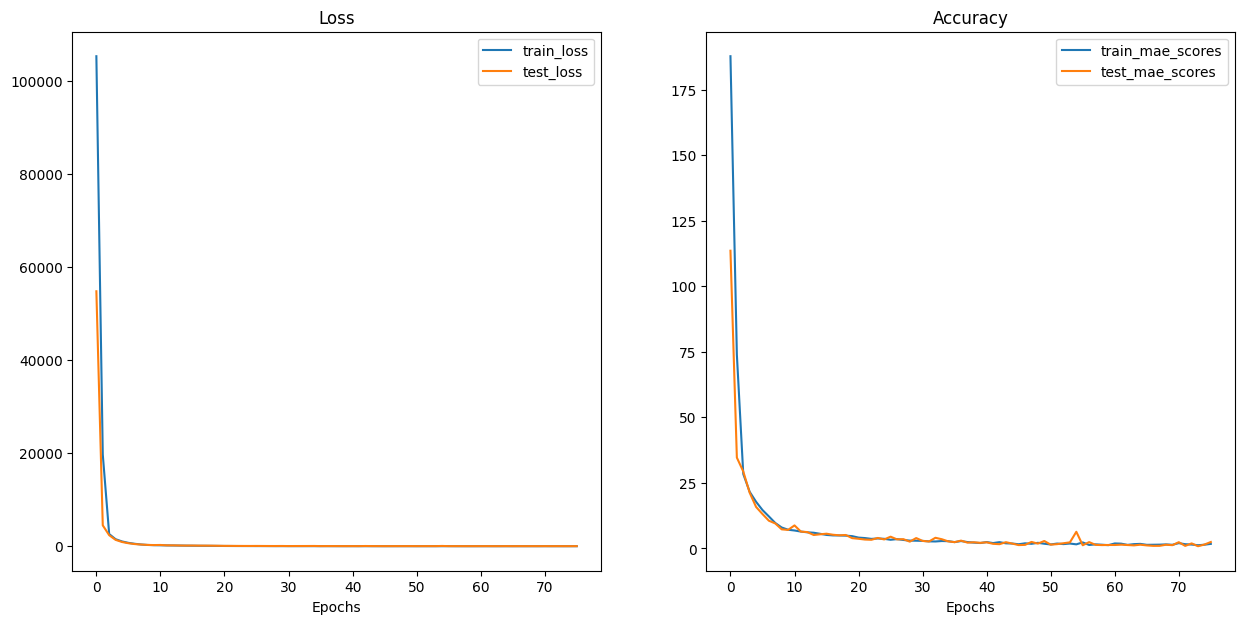

In [ ]:
# Setup a plot
plt.figure(figsize=(15, 7))
trained_epochs = 76

# Plot loss
plt.subplot(1, 2, 1)
plt.plot(range(trained_epochs), train_losses, label='train_loss')
plt.plot(range(trained_epochs), test_losses, label='test_loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.legend()

# Plot accuracy
plt.subplot(1, 2, 2)
plt.plot(range(trained_epochs), train_mae_scores, label='train_mae_scores')
plt.plot(range(trained_epochs), test_mae_scores, label='test_mae_scores')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.legend();